# Joint fitting XRT and GBM data with XSPEC models

### Goals

3ML is designed to properly joint fit data from different instruments with thier instrument dependent likelihoods.
We demostrate this with joint fitting data from GBM and XRT while simultaneously showing hwo to use the XSPEC models form **astromodels**

### Setup

You must have you HEASARC initiated so that **astromodels** can find the XSPEC libraries. 




In [1]:
%matplotlib inline
from threeML import *
import os


Did you try to import pygsl in the build directory?

Well, that does not work out of the box. If you want to do that, please
use
      python setup.py build_ext -i
to add the necessary extension module in the local pygsl/ directory!

Please read the README first! Any further questions or missing information
please post to pygsl-discuss@lists.sourceforge.net!

Configuration read from /Users/jburgess/.threeML/threeML_config.yml



WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176


WARNING RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incom

## Load XRT data

Make a likelihood for the XRT including all the appropriate files

Auto-probed noise models:
- observation: poisson
- background: poisson



WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal


WARNING RuntimeWarning: invalid value encountered in less_equal



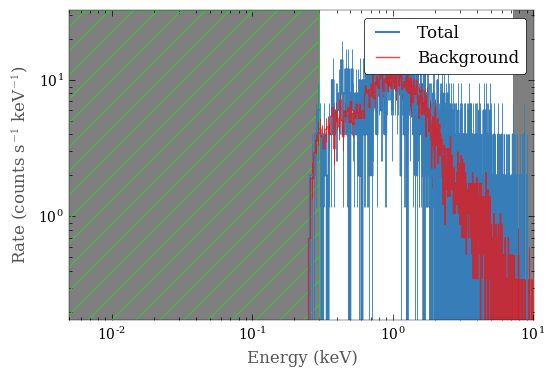

In [2]:
trigger="GRB110731A"
dec=-28.546
ra=280.52
xrt_dir='xrt'
xrt = SwiftXRTLike("XRT",pha_file=os.path.join(xrt_dir,"xrt_src.pha"),
                   bak_file=os.path.join(xrt_dir,"xrt_bkg.pha"),
                   rsp_file=os.path.join(xrt_dir,"xrt.rmf"),
                   arf_file=os.path.join(xrt_dir,"xrt.arf"))



#xrt.set_active_measurements(".01-.5",use_quality=True)

#xrt.rebin_on_background(10)

xrt.view_count_spectrum()

In [3]:
xrt.scale_factor

8.28870453336901e-06

Range .001-10 translates to channels 0-999
Now using 1000 channels out of 1024



WARNING UserWarning: You have opted to use channels which are flagged BAD in the PHA file.


WARNING UserWarning: These channels are:


WARNING UserWarning: channel:0


WARNING UserWarning: channel:1


WARNING UserWarning: channel:2


WARNING UserWarning: channel:3


WARNING UserWarning: channel:4


WARNING UserWarning: channel:5


WARNING UserWarning: channel:6


WARNING UserWarning: channel:7


WARNING UserWarning: channel:8


WARNING UserWarning: channel:9


WARNING UserWarning: channel:10


WARNING UserWarning: channel:11


WARNING UserWarning: channel:12


WARNING UserWarning: channel:13


WARNING UserWarning: channel:14


WARNING UserWarning: channel:15


WARNING UserWarning: channel:16


WARNING UserWarning: channel:17


WARNING UserWarning: channel:18


WARNING UserWarning: channel:19


WARNING UserWarning: channel:20


WARNING UserWarning: channel:21


WARNING UserWarning: channel:22


WARNING UserWarning: channel:23


WARNING UserWarning: channel:24


WARNING UserWarning: ch

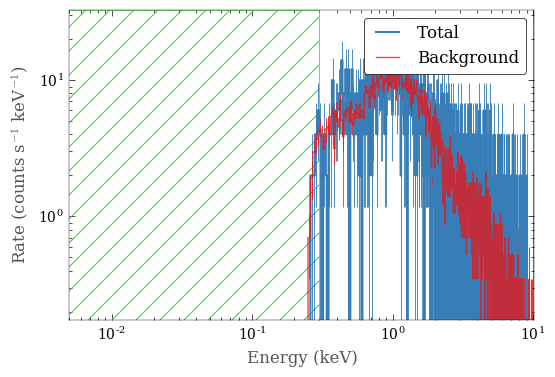

In [6]:
xrt.remove_rebinning()
xrt.set_active_measurements(".001-10",use_quality=False)

xrt.view_count_spectrum()

## Load GBM data

Load all the GBM data you need and make appropriate background, source time, and energy selections. Make sure to check the light curves! 

In [3]:

gbm_dir=os.path.join('gbm','bn110731A')

# Select the time interval
src_selection = "100.169342-150.169342"

nai3 = FermiGBMTTELike('NAI3',
                         os.path.join(gbm_dir,"glg_tte_n3_bn110731465_v00.fit"),
                         "20-90,160-250", # background selection
                         src_selection,          # source interval
                         rsp_file=os.path.join(gbm_dir, "glg_cspec_n3_bn110731465_v00.rsp2"))


Auto-determined polynomial order: 1


Auto-probed noise models:
- observation: poisson
- background: gaussian



WARNING UserWarning: No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming TLMIN=1


WARNING VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future



View the light curve

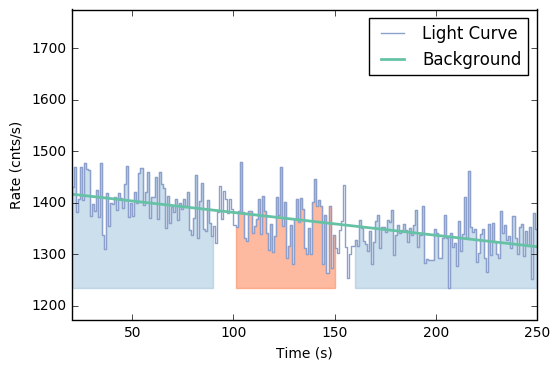

In [4]:
nai3.view_lightcurve(20,250)

Make energy selections and check them out

Range 8-900 translates to channels 4-123
Now using 120 channels out of 128


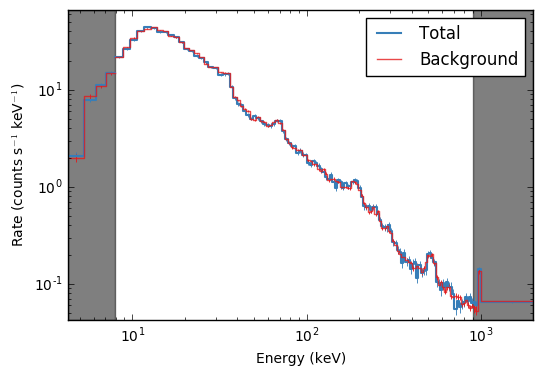

In [5]:
nai3.set_active_measurements("8-900")
nai3.view_count_spectrum()

## Setup the model

**astromodels** allows you to use XSPEC models if you have XSPEC installed.
Set all the normal parameters you would in XSPEC and build a model the normal **3ML/astromodel** way!


In [6]:
xspec_abund('angr')

spectral_model =  XS_phabs()* XS_zphabs() * XS_powerlaw()


spectral_model.nh_1=0.101
spectral_model.nh_1.fix = True

spectral_model.nh_2=0.1114424
spectral_model.nh_2.fix = True

spectral_model.redshift_2 = 0.618
spectral_model.redshift_2.fix =True

In [7]:
spectral_model.display()

* description: ((XS_phabs{1} * XS_zphabs{2}) * XS_powerlaw{3})
  * formula: (no latex formula available)
  * parameters: 
    * nh_1: 
      * value: 0.101
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: 1000000.0
      * unit: 1e+22
      * delta: 0.001
      * free: False
    * nh_2: 
      * value: 0.1114424
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: 1000000.0
      * unit: 1e+22
      * delta: 0.001
      * free: False
    * redshift_2: 
      * value: 0.618
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: -0.999
      * max_value: 10.0
      * unit: 
      * delta: 0.01
      * free: False
    * phoindex_3: 
      * value: 1.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: -3.0
      * max_value: 10.0
      * unit: 
      * delta: 0.01
      * free: True
    * norm_3: 
      * value: 1.0
      * desc: (see https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/XspecModels.html)
      * min_value: 0.0
      * max_value: None
      * unit: keV / (cm2 s)
      * delta: 0.1
      * free: True

## Setup the joint likelihood

Create a point source object and model. 

Load the data into a data list and create the joint likelihood


In [8]:
ptsrc = PointSource(trigger,ra,dec,spectral_shape=spectral_model)
model = Model(ptsrc)

In [9]:
data = DataList(xrt,nai3)

jl = JointLikelihood(model, data, verbose=False)
model.display()

name,value,min_value,max_value,unit,delta,free
GRB110731A.spectrum.main.composite.phoindex_3,1.0,-3.0,10.0,,0.01,True
GRB110731A.spectrum.main.composite.norm_3,1.0,0.0,None,keV / (cm2 s),0.1,True


## Fitting

### Maximum Likelihood style

In [10]:
res = jl.fit()

Best fit values:



#,Name,Best fit value,Unit
0,GRB110731A.spectrum.main.composite.phoindex_3,2.05 +/- 0.05,
1,GRB110731A.spectrum.main.composite.norm_3,0.209 +/- 0.008,keV / (cm2 s)



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.59
0.59,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,2528.925579
XRT,1634.050459
NAI3,894.875120


In [11]:
res = jl.get_errors()

Name,Value,Unit
GRB110731A.spectrum.main.composite.phoindex_3,2.05 -0.05 +0.06,
GRB110731A.spectrum.main.composite.norm_3,0.209 -0.008 +0.009,keV / (cm2 s)


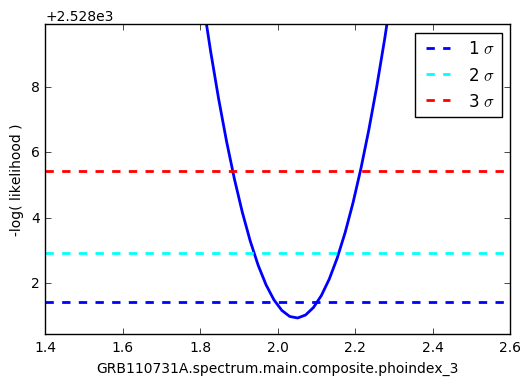

In [12]:
res = jl.get_contours(spectral_model.phoindex_3,1.5,2.5,50)

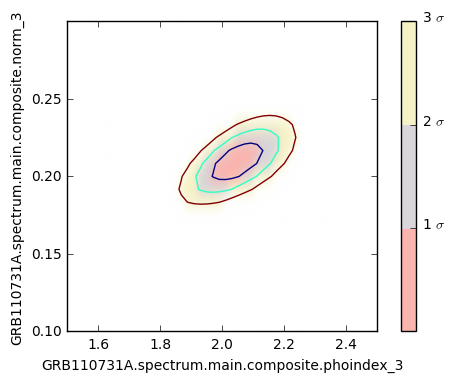

In [13]:
res = jl.get_contours(spectral_model.norm_3,.1,.3,25,spectral_model.phoindex_3,1.5,2.5,50)

### And then go Bayesian!

In [14]:
spectral_model.phoindex_3.prior = Uniform_prior(lower_bound=-5.0, upper_bound=5.0)
spectral_model.norm_3.prior = Log_uniform_prior(lower_bound=1E-5, upper_bound=1)

In [15]:
bayes = BayesianAnalysis(model, data)

In [16]:
samples = bayes.sample(n_walkers=50,burn_in=100, n_samples=1000)

Running burn-in of 100 samples...


Sampling...


Mean acceptance fraction: 0.71478


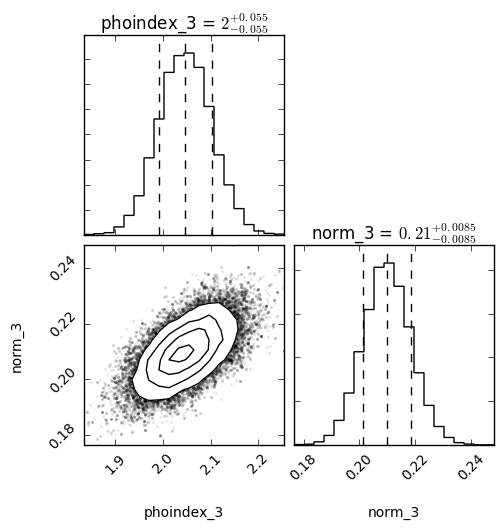

In [17]:
fig = bayes.corner_plot(plot_contours=True, plot_density=False)


In [18]:
bayes.get_highest_density_interval()

Name,Value,Unit
GRB110731A.spectrum.main.composite.phoindex_3,2.05 -0.11 +0.11,
GRB110731A.spectrum.main.composite.norm_3,0.210 -0.017 +0.017,keV / (cm2 s)


OrderedDict([('GRB110731A.spectrum.main.composite.phoindex_3',
              {'lower bound': 1.9378758501195972,
               'median': 2.0470182213962556,
               'upper bound': 2.1544203775899127}),
             ('GRB110731A.spectrum.main.composite.norm_3',
              {'lower bound': 0.19310005904270033,
               'median': 0.20986057245173392,
               'upper bound': 0.22669524128769092})])